## Notebook: using jsonstat.py to explore Istat data
This Jupyter notebook shows how to use [jsonstat.py](http://github.com/26fe/jsonstat.py) python library to explore Istat data.
[Istat](http://www.istat.it/en/about-istat) is Italian National Institute of Statistics. It publishs a rest api for querying italian statistics. 

In [1]:
from __future__ import print_function
import os
import istat

Setting a cache dir to store json files download by Istat api

In [2]:
cache_dir = os.path.abspath(os.path.join("..", "tmp", "istat_cached"))
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)
print("cache_dir is '{}'".format(cache_dir))

cache_dir is '/Users/26fe_nas/prj.python/jsonstat.py/tmp/istat_cached'


List all istat areas

In [3]:
istat.cache_dir(cache_dir)
for istat_area in istat.areas():
    print(istat_area)

CEN:2011 Population and housing census
ENT:Enterprises
ENV:Environment and Energy
POP:Population and Households
HOU:Households Economic Conditions and Disparities
HEA:Health statistics
WEL:Social Security and Welfare
EDU:Education and training
COM:Communication, culture and leisure
JUS:Justice and Security
OPI:Citizens' opinions and satisfaction with life
SOC:Social participation
ACC:National Accounts
AGR:Agriculture
IND:Industry and Construction
SER:Services
PUB:Public Administrations and Private Institutions
EXT:External Trade and Internationalisation
PRI:Prices
LAB:Labour


List all datasets contained into area `Prices`

In [4]:
istat_area_name = 'Prices'
istat_area = istat.area(istat_area_name)

for istat_dataset in istat_area.datasets():
    print(u"{}({}):{}".format(istat_dataset.cod(), istat_dataset.nrdim(), istat_dataset.name()))

DCSP_FOI1B2015(5):FOI - Monthly data from 2016 onwards
DCSP_NICUNOB(5):NIC  Monthly data until 2010
DCSP_FOI3B2010(4):FOI  Weights from 2011 onwards
DCSP_NIC3B2015(4):NIC - Weights from 2016 onwards
DCSP_NICUNOBB2010(5):NIC  Monthly data from 2011 onwards
DCSP_IPCATC2(5):HICP at constant tax rates  Annual average from 2002 onwards (base 2005=100) 
DCSP_IPCATC1(5):HICP at constant tax rates  Monthly data from 2002 onwards (base 2005=100) 
DCSP_FOI2B2015(5):FOI - Annual average from 2016 onwards
DCSP_NICTREB2010(4):NIC  Weights from 2011 onwards
DCSP_IPCATC1B2015(5):HICP at constant tax rates - Monthly data from 2016 onwards (base 2015=100) 
DCSP_IPCA1(5):HICP  Monthly data from 2001 onwards (base 2005=100)
DCSP_NICDUE(5):NIC  Annual average until 2010
DCSP_IPCA3(4):HICP  Weights from 2001 onwards
DCSP_FOI2(5):FOI  Annual average  until 2010
DCSP_FOI3(4):FOI  Weights until 2010
DCSP_FOI1(5):FOI  Monthly data until 2010
DCSP_IPCA2(5):HICP  Annual average from 2001 onwards (ba

List all dimension for dataset `DCSP_IPAB` (House price index)

In [5]:
istat_dataset_name = 'DCSP_IPAB'
istat_dataset = istat_area.dataset(istat_dataset_name)
istat_dataset.info_dimensions()

dim 0 'Territory' (1:'Italy')
dim 1 'Index type' (18:'house price index (base 2010=100) - quarterly data', 19:'house price index (base 2010=100) - annual average', 20:'house price index (base 2010=100) - weights')
dim 2 'Measure' (8:'annual average rate of change', 4:'index number', 22:'not applicable', 6:'percentage changes on the previous period', 7:'percentage changes on the same period of the previous year')
dim 3 'Purchases of dwellings' (4:'H1 - all items', 5:'H11 - new dwellings', 6:'H12 - existing dwellings')
dim 4 'Time and frequency' (2178:'Q3-2014', 2182:'Q4-2014', 2186:'2015', 2188:'Q1-2015', 2192:'Q2-2015', 2197:'Q3-2015', 2091:'2010', 2093:'Q1-2010', 2097:'Q2-2010', 2102:'Q3-2010', 2106:'Q4-2010', 2110:'2011', 2112:'Q1-2011', 2116:'Q2-2011', 2121:'Q3-2011', 2125:'Q4-2011', 2129:'2012', 2131:'Q1-2012', 2135:'Q2-2012', 2140:'Q3-2012', 2144:'Q4-2012', 2148:'2013', 2150:'Q1-2013', 2154:'Q2-2013', 2159:'Q3-2013', 2163:'Q4-2013', 2167:'2014', 2169:'Q1-2014', 2173:'Q2-2014')


Extract data from dataset `DCSP_IPAB` with dimension "1,18,0,0,0" where the first dimension is Territory, etc. Below is the mapping: 
- dimension Territory 1 -> Italy
- dimension Type 18 -> 'house price index (base 2010=100) - quarterly data'
- dimenMeasure 0 -> ALL 
- Purchase of dwelling 0 -> ALL
- Time and frequency 0 -> ALL

| dimension            |    |                                                      |
|----------------------|----|------------------------------------------------------|
| Terrytory            | 1  | Italy                                                |
| Type                 | 18 | house price index (base 2010=100) - quarterly data'  |
| Measure              | 0  | ALL                                                  |  
| Purchase of dwelling | 0  | ALL                                                  |  
| Time and frequency   | 0  | ALL                                                  |

In [6]:
# TODO: passing dictionary to getvalues
spec = { 
    "Territory": 1, "Index type": 18, 
    # "Measure": 0, # "Purchases of dwelling": 0, # "Time and frequency": 0
}
# convert istat dataset into jsonstat collection and print some info
collection = istat_dataset.getvalues(spec)
collection.info()

0: dataset 'IDMISURA1*IDTYPPURCH*IDTIME'



Print some info of one dataset contained into the above jsonstat collection

In [7]:
jsonstat_dataset = collection.dataset('IDMISURA1*IDTYPPURCH*IDTIME')
jsonstat_dataset.info()

name:   'IDMISURA1*IDTYPPURCH*IDTIME'
label:  'House price index  by Measure, Purchases of dwellings and Time and frequency - Italy - house price index (base 2010=100) - quarterly data'
size: 207
3 dimensions:
  0: dim id/name: 'IDMISURA1' size: '3' role: 'None'
  1: dim id/name: 'IDTYPPURCH' size: '3' role: 'None'
  2: dim id/name: 'IDTIME' size: '23' role: 'None'



In [8]:
jsonstat_dataset.dimension('IDMISURA1')

index
  pos    idx  label
    0      4 index number
    1      6 percentage changes on the previous period
    2      7 percentage changes on the same period of the previous year

In [9]:
jsonstat_dataset.dimension('IDTYPPURCH')

index
  pos    idx  label
    0      4 H1 - all items
    1      5 H11 - new dwellings
    2      6 H12 - existing dwellings

In [10]:
jsonstat_dataset.dimension('IDTIME')

index
  pos    idx  label
    0   2093 Q1-2010
    1   2097 Q2-2010
    2   2102 Q3-2010
    3   2106 Q4-2010
    4   2112 Q1-2011
    5   2116 Q2-2011
    6   2121 Q3-2011
    7   2125 Q4-2011
    8   2131 Q1-2012
    9   2135 Q2-2012
   10   2140 Q3-2012
   11   2144 Q4-2012
   12   2150 Q1-2013
   13   2154 Q2-2013
   14   2159 Q3-2013
   15   2163 Q4-2013
   16   2169 Q1-2014
   17   2173 Q2-2014
   18   2178 Q3-2014
   19   2182 Q4-2014
   20   2188 Q1-2015
   21   2192 Q2-2015
   22   2197 Q3-2015

In [11]:
json_stat_data = istat_dataset.getvalues("1,18,4,4,0")
json_stat_data

0: dataset 'IDTIME'

In [12]:
import pandas as pd
df = jsonstat_dataset.to_table(rtype=pd.DataFrame)
df.head()

,Measure,Purchases of dwellings,Time and frequency,Value
0,index number,H1 - all items,Q1-2010,99.5
1,percentage changes on the previous period,H1 - all items,Q1-2010,NaN
2,percentage changes on the same period of the p...,H1 - all items,Q1-2010,NaN
3,index number,H11 - new dwellings,Q1-2010,99.1
4,percentage changes on the previous period,H11 - new dwellings,Q1-2010,NaN


In [13]:
filtered = df.loc[
    (df['Measure'] == 'index number') & (df['Purchases of dwellings'] == 'H1 - all items'), 
    ['Time and frequency', 'Value']
]
filtered.set_index('Time and frequency')

,Value
Time and frequency,
Q1-2010,99.5
Q2-2010,100.0
Q3-2010,100.3
Q4-2010,100.2
Q1-2011,100.1
Q2-2011,101.2
Q3-2011,101.2
Q4-2011,100.5
Q1-2012,99.9


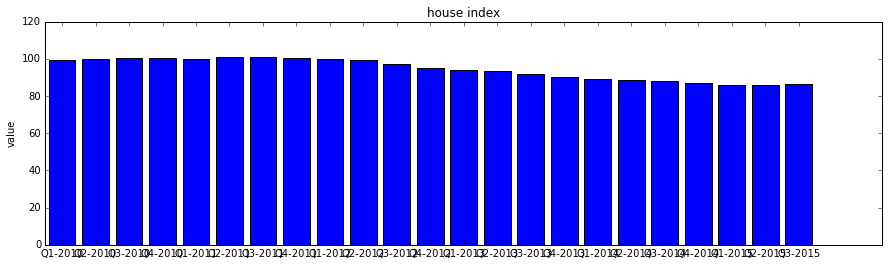

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

values = filtered['Value'].tolist()
labels = filtered['Time and frequency']

xs = [i + 0.1 for i, _ in enumerate(values)]
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates # so that each bar is centered

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.figure(figsize=(15,4))
plt.bar(xs, values)
plt.ylabel("value")
plt.title("house index")

# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(labels)], labels) 
plt.show()